# Import Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Grab HTML

In [2]:
date_response = requests.get("https://nuforc.org/webreports/ndxevent.html")
date_response
#subpage report URL selectors


<Response [200]>

In [3]:
state_response = requests.get("https://nuforc.org/webreports/ndxloc.html")
state_response
#subpage report URL selectors
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(1) > td:nth-child(1) > a
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(2) > td:nth-child(1) > a
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(3) > td:nth-child(1) > a

<Response [200]>

In [4]:
shape_response = requests.get("https://nuforc.org/webreports/ndxshape.html")
shape_response
#subpage report URL selectors href =
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(1) > td:nth-child(1) > a
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(2) > td:nth-child(1) > a
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(3) > td:nth-child(1) > a

<Response [200]>

# HTML to DOM using BeautifulSoup

In [5]:
date_html = date_response.text
date_soup = BeautifulSoup(date_html)
type(date_soup)

bs4.BeautifulSoup

In [6]:
state_html = state_response.text
state_soup = BeautifulSoup(state_html)
type(state_soup)

bs4.BeautifulSoup

In [7]:
shape_html = shape_response.text
shape_soup = BeautifulSoup(shape_html)
type(shape_soup)

bs4.BeautifulSoup

# Selectors

## By State Table

In [8]:
#Main report selectors for count by state
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(1) > td:nth-child(2)
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(2) > td:nth-child(2)
#Main report selectors for state name
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(3) > td:nth-child(1) > a
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(2) > td:nth-child(1) > a
#body > font:nth-child(3) > p > font > table > tbody > tr:nth-child(1) > td:nth-child(1) > a

In [9]:
state_table = state_soup.select("table")
state_table

[<table cellspacing="1"> <thead> <tr> <th bgcolor="#c0c0c0" bordercolor="#000000"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">Reports</font></th> <th bgcolor="#c0c0c0" bordercolor="#000000"><font color="#000000" face="Calibri" style="FONT-SIZE:11pt">Count</font></th> </tr> </thead> <tbody> <tr valign="TOP"><td><a href="ndxlAL.html">ALABAMA</a></td><td>1355</td></tr>
 <tr valign="TOP"><td><a href="ndxlAK.html">ALASKA</a></td><td>630</td></tr>
 <tr valign="TOP"><td><a href="ndxlAZ.html">ARIZONA</a></td><td>4824</td></tr>
 <tr valign="TOP"><td><a href="ndxlAR.html">ARKANSAS</a></td><td>1245</td></tr>
 <tr valign="TOP"><td><a href="ndxlCA.html">CALIFORNIA</a></td><td>15766</td></tr>
 <tr valign="TOP"><td><a href="ndxlCO.html">COLORADO</a></td><td>3155</td></tr>
 <tr valign="TOP"><td><a href="ndxlCT.html">CONNECTICUT</a></td><td>1966</td></tr>
 <tr valign="TOP"><td><a href="ndxlDE.html">DELAWARE</a></td><td>405</td></tr>
 <tr valign="TOP"><td><a href="ndxlDC.html">DISTRICT O

In [10]:
# Find the header row (first row) of the table
#body > font:nth-child(3) > p > font > table > thead > tr > th:nth-child(1) > font
#body > font:nth-child(3) > p > font > table > thead > tr > th:nth-child(2) > font

state_header = state_soup.select("thead th")
staterpt_header = [header.text for header in state_header]
staterpt_header

['Reports', 'Count']

In [11]:
state_els = state_soup.select("tbody tr")
print(len(state_els)) 
print("------------")

state_entries = [
    [cell.text for cell in row.select("td")]
    for row in state_els
]

state_entries

65
------------


[['ALABAMA', '1355'],
 ['ALASKA', '630'],
 ['ARIZONA', '4824'],
 ['ARKANSAS', '1245'],
 ['CALIFORNIA', '15766'],
 ['COLORADO', '3155'],
 ['CONNECTICUT', '1966'],
 ['DELAWARE', '405'],
 ['DISTRICT OF COLUMBIA', '147'],
 ['FLORIDA', '8023'],
 ['GEORGIA', '2648'],
 ['HAWAII', '660'],
 ['IDAHO', '1321'],
 ['ILLINOIS', '4188'],
 ['INDIANA', '2647'],
 ['IOWA', '1192'],
 ['KANSAS', '1153'],
 ['KENTUCKY', '1650'],
 ['LOUISIANA', '1102'],
 ['MAINE', '1159'],
 ['MARYLAND', '1776'],
 ['MASSACHUSETTS', '2615'],
 ['MICHIGAN', '3562'],
 ['MINNESOTA', '2057'],
 ['MISSISSIPPI', '764'],
 ['MISSOURI', '2741'],
 ['MONTANA', '980'],
 ['NEBRASKA', '684'],
 ['NEVADA', '1646'],
 ['NEW HAMPSHIRE', '1164'],
 ['NEW JERSEY', '2811'],
 ['NEW MEXICO', '1623'],
 ['NEW YORK', '5723'],
 ['NORTH CAROLINA', '3564'],
 ['NORTH DAKOTA', '271'],
 ['OHIO', '4345'],
 ['OKLAHOMA', '1441'],
 ['OREGON', '3474'],
 ['PENNSYLVANIA', '4887'],
 ['RHODE ISLAND', '589'],
 ['SOUTH CAROLINA', '2194'],
 ['SOUTH DAKOTA', '381'],
 ['TENNES

In [12]:
#Make it into a dataframe
state_df = pd.DataFrame(state_entries, columns = staterpt_header)
state_df

,Reports,Count
0,ALABAMA,1355
1,ALASKA,630
2,ARIZONA,4824
3,ARKANSAS,1245
4,CALIFORNIA,15766
...,...,...
60,ONTARIO,2439
61,PRINCE EDW ISLAND,24
62,PROV OF QUE,102
63,SASKATCHEWAN,39


In [13]:
#Export the dataframe to local CSV
#state_df.to_csv("C:\\Users\\artif\\OneDrive\\Desktop\\Scatterplots and Tea\\VS Code\\UFOs\\ufos_by_state.csv", index=False)

## By Date Table

In [14]:
date_header = date_soup.select("thead th")
daterpt_header = [header.text for header in date_header]
daterpt_header

['Reports', 'Count']

In [15]:
date_els = date_soup.select("tbody tr")
print(len(date_els)) 
print("------------")

date_entries = [
    [cell.text for cell in row.select("td")]
    for row in date_els
]

date_entries

978
------------


[['05/2023', '138'],
 ['04/2023', '267'],
 ['03/2023', '269'],
 ['02/2023', '390'],
 ['01/2023', '310'],
 ['12/2022', '302'],
 ['11/2022', '371'],
 ['10/2022', '506'],
 ['09/2022', '558'],
 ['08/2022', '532'],
 ['07/2022', '517'],
 ['06/2022', '449'],
 ['05/2022', '455'],
 ['04/2022', '327'],
 ['03/2022', '338'],
 ['02/2022', '326'],
 ['01/2022', '354'],
 ['12/2021', '379'],
 ['11/2021', '297'],
 ['10/2021', '300'],
 ['09/2021', '279'],
 ['08/2021', '280'],
 ['07/2021', '233'],
 ['06/2021', '237'],
 ['05/2021', '496'],
 ['04/2021', '292'],
 ['03/2021', '265'],
 ['02/2021', '263'],
 ['01/2021', '305'],
 ['12/2020', '395'],
 ['11/2020', '464'],
 ['10/2020', '548'],
 ['09/2020', '465'],
 ['08/2020', '738'],
 ['07/2020', '675'],
 ['06/2020', '395'],
 ['05/2020', '582'],
 ['04/2020', '1055'],
 ['03/2020', '839'],
 ['02/2020', '620'],
 ['01/2020', '634'],
 ['12/2019', '767'],
 ['11/2019', '712'],
 ['10/2019', '759'],
 ['09/2019', '678'],
 ['08/2019', '496'],
 ['07/2019', '619'],
 ['06/2019',

In [16]:
date_df = pd.DataFrame(date_entries, columns = daterpt_header)
date_df

,Reports,Count
0,05/2023,138
1,04/2023,267
2,03/2023,269
3,02/2023,390
4,01/2023,310
...,...,...
973,02/1721,1
974,09/1639,1
975,04/1561,2
976,06/1400,1


In [17]:
#date_df.to_csv("C:\\Users\\artif\\OneDrive\\Desktop\\Scatterplots and Tea\\VS Code\\UFOs\\ufos_by_date.csv", index=False)

## By Shape Table

In [18]:
shape_header = shape_soup.select("thead th")
shaperpt_header = [header.text for header in shape_header]
shaperpt_header

['Reports', 'Count']

In [19]:
shape_els = shape_soup.select("tbody tr")
print(len(shape_els)) 
print("------------")

shape_entries = [
    [cell.text for cell in row.select("td")]
    for row in shape_els
]

shape_entries

26
------------


[['Unspecified', '6377'],
 ['Changing', '3802'],
 ['Chevron', '1700'],
 ['Cigar', '3652'],
 ['Circle', '13958'],
 ['Cone', '597'],
 ['Cross', '488'],
 ['Cube', '8'],
 ['Cylinder', '2403'],
 ['Delta', '1'],
 ['Diamond', '2077'],
 ['Disk', '8526'],
 ['Egg', '1250'],
 ['Fireball', '9796'],
 ['Flash', '2393'],
 ['Formation', '4757'],
 ['Light', '27034'],
 ['Orb', '5418'],
 ['Other', '9901'],
 ['Oval', '6237'],
 ['Rectangle', '2526'],
 ['Sphere', '7512'],
 ['Star', '126'],
 ['Teardrop', '1219'],
 ['Triangle', '12879'],
 ['Unknown', '9814']]

In [20]:
shape_df = pd.DataFrame(shape_entries, columns = shaperpt_header)
shape_df

,Reports,Count
0,Unspecified,6377
1,Changing,3802
2,Chevron,1700
3,Cigar,3652
4,Circle,13958
5,Cone,597
6,Cross,488
7,Cube,8
8,Cylinder,2403
9,Delta,1


In [22]:
#shape_df.to_csv("C:\\Users\\artif\\OneDrive\\Desktop\\Scatterplots and Tea\\VS Code\\UFOs\\ufos_by_shape.csv", index=False)

# Create a Waffle Chart and a Polar Chart

In [23]:
#!pip install pywaffle

     ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
     ---------------------------------------- 0.2/25.2 MB 5.3 MB/s eta 0:00:05
      --------------------------------------- 0.5/25.2 MB 6.3 MB/s eta 0:00:04
     - -------------------------------------- 1.0/25.2 MB 7.7 MB/s eta 0:00:04
     -- ------------------------------------- 1.5/25.2 MB 9.6 MB/s eta 0:00:03
     --- ------------------------------------ 2.0/25.2 MB 9.2 MB/s eta 0:00:03
     ---- ----------------------------------- 2.6/25.2 MB 9.9 MB/s eta 0:00:03
     ----- ---------------------------------- 3.2/25.2 MB 10.2 MB/s eta 0:00:03
     ------ --------------------------------- 3.8/25.2 MB 10.6 MB/s eta 0:00:03
     ------- -------------------------------- 4.4/25.2 MB 10.8 MB/s eta 0:00:02
     -------- ------------------------------- 5.1/25.2 MB 11.2 MB/s eta 0:00:02
     -------- ------------------------------- 5.7/25.2 MB 11.3 MB/s eta 0:00:02
     --------- ------------------------------ 6.2/25.2


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

In [26]:
waffle_dict = {
    'Shape': ['Circle', 'Disk', 'Sphere', 'Orb', 'Fireball', 'Oval', 'Other'],
    'Count': [13958, 8526, 7512, 5418, 9796, 6237, 93004]
}

waffle_df = pd.DataFrame.from_dict(waffle_dict)
waffle_df

,Shape,Count
0,Circle,13958
1,Disk,8526
2,Sphere,7512
3,Orb,5418
4,Fireball,9796
5,Oval,6237
6,Other,93004


In [34]:
colors = ['#81C48D', '#81C4AF', '#81B8C4', '#8197C4', '#8D81C4', '#AF81C4', '#EBEBEB']
plot_labels = [f'{i} ({str(j)} %)' for i,j in zip(waffle_df.Shape, 
                                                    waffle_df.Count)]

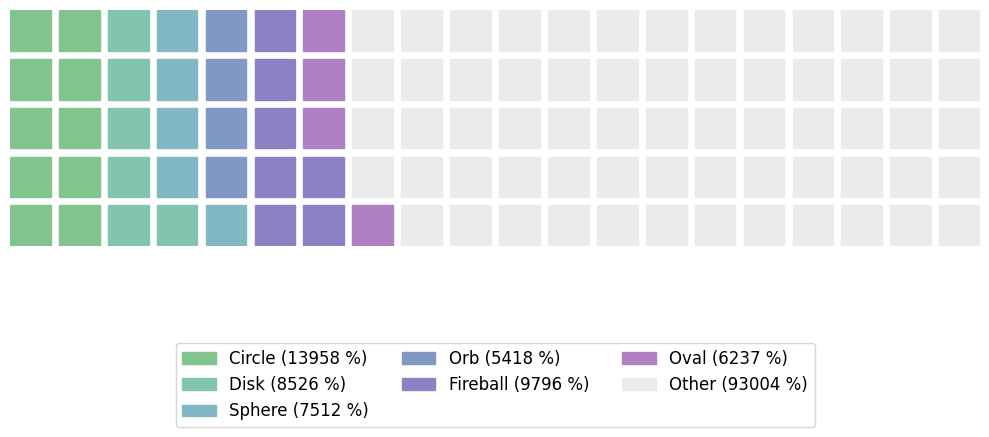

In [40]:
plt.figure(FigureClass=Waffle, figsize=(10,10), rows=5, columns = 20, 
                 values=list(waffle_df['Count']),
                 colors=colors,
                 labels=plot_labels,
                legend={'loc':'lower center', 'bbox_to_anchor': (0.5, -0.8), 
                        'ncol':3, 'fontsize':12})
plt.show()

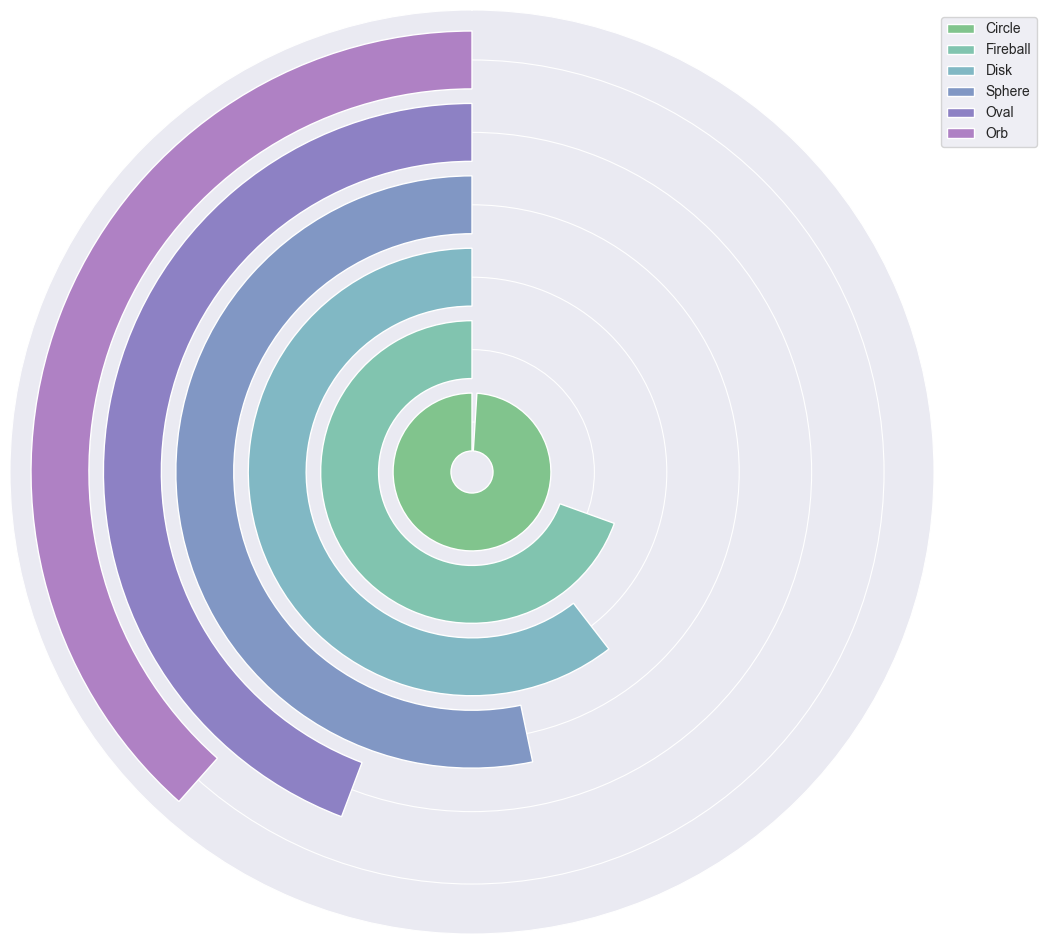

In [59]:
#!pip install seaborn
# import seaborn as sns
# import math
#import numpy as np

polar_dict = {
    'Shape': ['Circle', 'Fireball', 'Disk', 'Sphere', 'Oval', 'Orb'],
    'Count': [13958, 9796, 8526, 7512, 6237, 5418]
}

polar_df = pd.DataFrame.from_dict(polar_dict)
polar_colors = ['#81C48D', '#81C4AF', '#81B8C4', '#8197C4', '#8D81C4', '#AF81C4']

plt.gcf().set_size_inches(12, 12)
sns.set_style('darkgrid')

#set max value
max_val = max(polar_df['Count'])*1.01
ax = plt.subplot(projection='polar')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
#ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(polar_df)))

#set the projection
ax = plt.subplot(projection='polar')

for i in range(len(polar_df)):
    ax.barh(i, list(polar_df['Count'])[i]*2*np.pi/max_val,
            label=list(polar_df['Shape'])[i], color=polar_colors[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

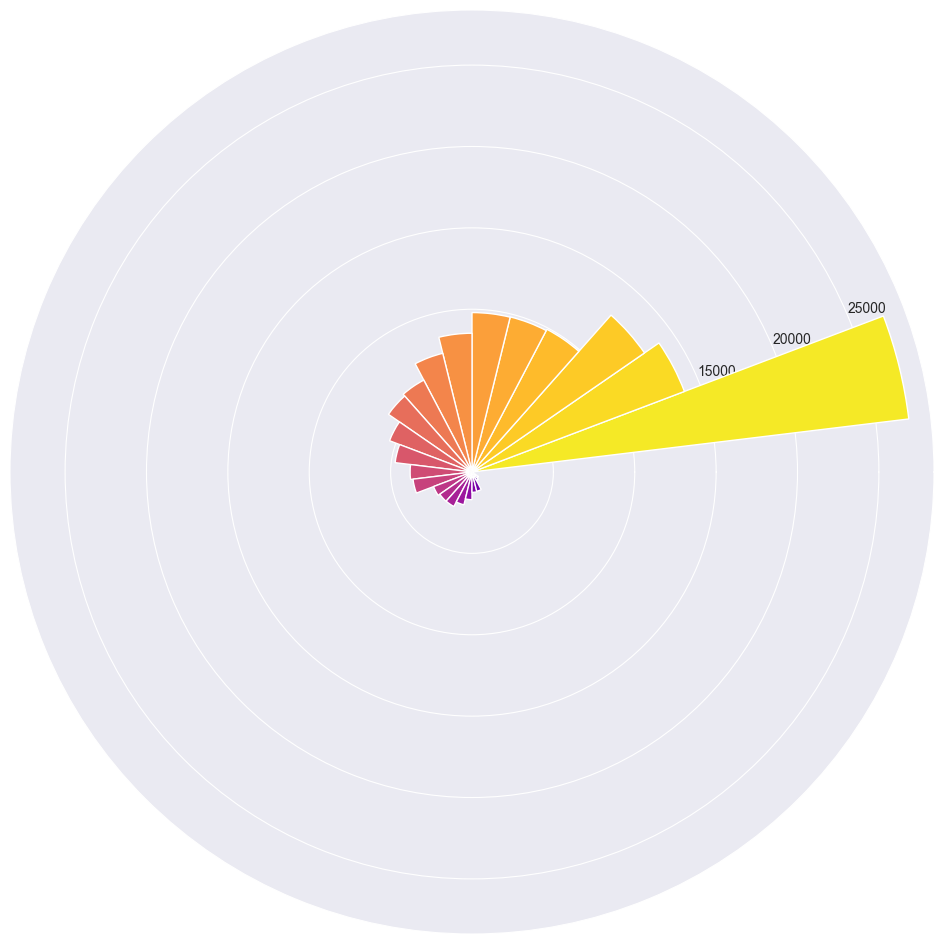

In [76]:
radial_dict = {
    'Shape': ['Light', 'Circle', 'Triangle', 'Other', 'Unknown', 'Fireball', 'Disk', 'Sphere', 'Unspecified', 'Oval', 'Orb', 'Formation', 'Changing', 'Cigar', 'Rectangle', 'Cylinder', 'Flash', 'Diamond', 'Chevron', 'Egg', 'Teardrop', 'Cone', 'Cross', 'Star', 'Cube', 'Delta'],
    'Count': [27034, 13958, 12879, 9901, 9814, 9796, 8526, 7512, 6377, 6237, 5418, 4757, 3802, 3652, 2526, 2403, 2393, 2077, 1700, 1250, 1219, 597, 488, 126, 8, 1]
}

radial_df = pd.DataFrame.from_dict(radial_dict)

def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

pal_vi = get_color('viridis_r', len(radial_df))
pal_plas = get_color('plasma_r', len(radial_df))
pal_spec = get_color('Spectral', len(radial_df))
pal_hsv = get_color('hsv', len(radial_df))

plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = radial_df['Count'].max()

#set heights and width
heights = radial_df['Count']
width = 2*np.pi / len(radial_df.index)

#set index and angle
indexes = list(range(1, len(radial_df.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal_plas)
labelPadding = 500

for bar, angle, height, label in zip(bars,angles, heights, radial_df['Shape']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
#     ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
#             s=label, ha=alignment, va='center', rotation=rotation, 
#             rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])
plt.show()